# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

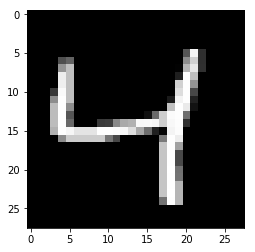

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [77]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

img_size = mnist.train.images.shape[1]


# Input and target placeholders
inputs_  = tf.placeholder(tf.float32, shape=(None,img_size), name='inputs')
targets_ = tf.placeholder(tf.float32, shape=(None,img_size), name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
#encoded = tf.contrib.layers.fully_connected()
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, img_size)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

# Training

In [78]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [79]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6944
Epoch: 1/20... Training loss: 0.6910
Epoch: 1/20... Training loss: 0.6875
Epoch: 1/20... Training loss: 0.6836
Epoch: 1/20... Training loss: 0.6786
Epoch: 1/20... Training loss: 0.6726
Epoch: 1/20... Training loss: 0.6655
Epoch: 1/20... Training loss: 0.6566
Epoch: 1/20... Training loss: 0.6460
Epoch: 1/20... Training loss: 0.6360
Epoch: 1/20... Training loss: 0.6220
Epoch: 1/20... Training loss: 0.6096
Epoch: 1/20... Training loss: 0.5931
Epoch: 1/20... Training loss: 0.5780
Epoch: 1/20... Training loss: 0.5625
Epoch: 1/20... Training loss: 0.5395
Epoch: 1/20... Training loss: 0.5246
Epoch: 1/20... Training loss: 0.5044
Epoch: 1/20... Training loss: 0.4864
Epoch: 1/20... Training loss: 0.4650
Epoch: 1/20... Training loss: 0.4522
Epoch: 1/20... Training loss: 0.4304
Epoch: 1/20... Training loss: 0.4145
Epoch: 1/20... Training loss: 0.4007
Epoch: 1/20... Training loss: 0.3914
Epoch: 1/20... Training loss: 0.3739
Epoch: 1/20... Training loss: 0.3618
E

Epoch: 1/20... Training loss: 0.2007
Epoch: 1/20... Training loss: 0.1944
Epoch: 1/20... Training loss: 0.1966
Epoch: 1/20... Training loss: 0.1924
Epoch: 1/20... Training loss: 0.1970
Epoch: 1/20... Training loss: 0.1972
Epoch: 1/20... Training loss: 0.1928
Epoch: 1/20... Training loss: 0.1998
Epoch: 1/20... Training loss: 0.1994
Epoch: 1/20... Training loss: 0.1903
Epoch: 1/20... Training loss: 0.1901
Epoch: 1/20... Training loss: 0.1994
Epoch: 1/20... Training loss: 0.1919
Epoch: 1/20... Training loss: 0.1897
Epoch: 1/20... Training loss: 0.1942
Epoch: 1/20... Training loss: 0.1923
Epoch: 1/20... Training loss: 0.1857
Epoch: 1/20... Training loss: 0.1938
Epoch: 1/20... Training loss: 0.1911
Epoch: 1/20... Training loss: 0.1936
Epoch: 1/20... Training loss: 0.1847
Epoch: 1/20... Training loss: 0.1909
Epoch: 1/20... Training loss: 0.1938
Epoch: 1/20... Training loss: 0.1962
Epoch: 1/20... Training loss: 0.1950
Epoch: 1/20... Training loss: 0.1903
Epoch: 1/20... Training loss: 0.1853
E

Epoch: 2/20... Training loss: 0.1495
Epoch: 2/20... Training loss: 0.1588
Epoch: 2/20... Training loss: 0.1540
Epoch: 2/20... Training loss: 0.1548
Epoch: 2/20... Training loss: 0.1538
Epoch: 2/20... Training loss: 0.1556
Epoch: 2/20... Training loss: 0.1550
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1543
Epoch: 2/20... Training loss: 0.1599
Epoch: 2/20... Training loss: 0.1557
Epoch: 2/20... Training loss: 0.1533
Epoch: 2/20... Training loss: 0.1579
Epoch: 2/20... Training loss: 0.1547
Epoch: 2/20... Training loss: 0.1563
Epoch: 2/20... Training loss: 0.1553
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1560
Epoch: 2/20... Training loss: 0.1497
Epoch: 2/20... Training loss: 0.1500
Epoch: 2/20... Training loss: 0.1534
Epoch: 2/20... Training loss: 0.1503
Epoch: 2/20... Training loss: 0.1547
Epoch: 2/20... Training loss: 0.1519
Epoch: 2/20... Training loss: 0.1536
Epoch: 2/20... Training loss: 0.1638
Epoch: 2/20... Training loss: 0.1516
E

Epoch: 3/20... Training loss: 0.1396
Epoch: 3/20... Training loss: 0.1386
Epoch: 3/20... Training loss: 0.1390
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1402
Epoch: 3/20... Training loss: 0.1336
Epoch: 3/20... Training loss: 0.1336
Epoch: 3/20... Training loss: 0.1367
Epoch: 3/20... Training loss: 0.1339
Epoch: 3/20... Training loss: 0.1429
Epoch: 3/20... Training loss: 0.1381
Epoch: 3/20... Training loss: 0.1389
Epoch: 3/20... Training loss: 0.1364
Epoch: 3/20... Training loss: 0.1392
Epoch: 3/20... Training loss: 0.1363
Epoch: 3/20... Training loss: 0.1388
Epoch: 3/20... Training loss: 0.1301
Epoch: 3/20... Training loss: 0.1387
Epoch: 3/20... Training loss: 0.1456
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1399
Epoch: 3/20... Training loss: 0.1414
Epoch: 3/20... Training loss: 0.1344
Epoch: 3/20... Training loss: 0.1389
Epoch: 3/20... Training loss: 0.1308
Epoch: 3/20... Training loss: 0.1379
E

Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1287
Epoch: 4/20... Training loss: 0.1266
Epoch: 4/20... Training loss: 0.1293
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1272
Epoch: 4/20... Training loss: 0.1248
Epoch: 4/20... Training loss: 0.1271
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1296
Epoch: 4/20... Training loss: 0.1304
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1271
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1287
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1223
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1284
E

Epoch: 4/20... Training loss: 0.1137
Epoch: 4/20... Training loss: 0.1146
Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1193
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1155
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1140
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1137
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1149
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1164
E

Epoch: 5/20... Training loss: 0.1065
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1102
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1024
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1128
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1141
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1154
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1114
E

Epoch: 6/20... Training loss: 0.1083
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1068
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1079
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1088
Epoch: 6/20... Training loss: 0.1067
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1092
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1011
Epoch: 6/20... Training loss: 0.1081
Epoch: 6/20... Training loss: 0.1098
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1089
Epoch: 6/20... Training loss: 0.1038
E

Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1047
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1065
Epoch: 7/20... Training loss: 0.1048
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.0979
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1060
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1061
E

Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1015
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.0972
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1052
Epoch: 7/20... Training loss: 0.1040
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.1042
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.1045
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.0976
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1027
E

Epoch: 8/20... Training loss: 0.1020
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0999
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.1010
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.1019
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.1011
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0966
E

Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0917
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0930
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.1009
Epoch: 9/20... Training loss: 0.0975
Epoch: 9/20... Training loss: 0.0999
Epoch: 9/20... Training loss: 0.0938
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0992
E

Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.1001
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0922
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0928
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0995
Epoch: 10/20... Training loss: 0.0922
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0986
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0917
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0970
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0902
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0981
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0909
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0966
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0909
Epoch: 11/20... Training loss: 0.0987
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0968
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0981
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0970
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0963
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0980
Epoch: 12/20... Training loss: 0.0975
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0913
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0906
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0968
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0991
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0978
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0964
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0912
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0910
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0900
Epoch: 14/20... Training loss: 0.0970
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0904
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0904
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0925
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0987
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0906
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0909
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0971
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0893
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0978
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0890
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0949
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0925
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0971
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0917
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0895
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0882
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0898
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0959
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0909
Epoch: 16/20... Training loss: 0.0976
Epoch: 16/20... Training loss: 0.0892
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0969
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0885
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0907
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0964
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0902
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0973
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0903
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0927
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0901
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0907
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0902
Epoch: 17/20... Training loss: 0.0940
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0967
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0968
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0902
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0890
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0916
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0887
Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20... Training loss: 0.0977
Epoch: 20/20... Training loss: 0.0898
Epoch: 20/20... Training loss: 0.0953
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0947
Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0983
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0901
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

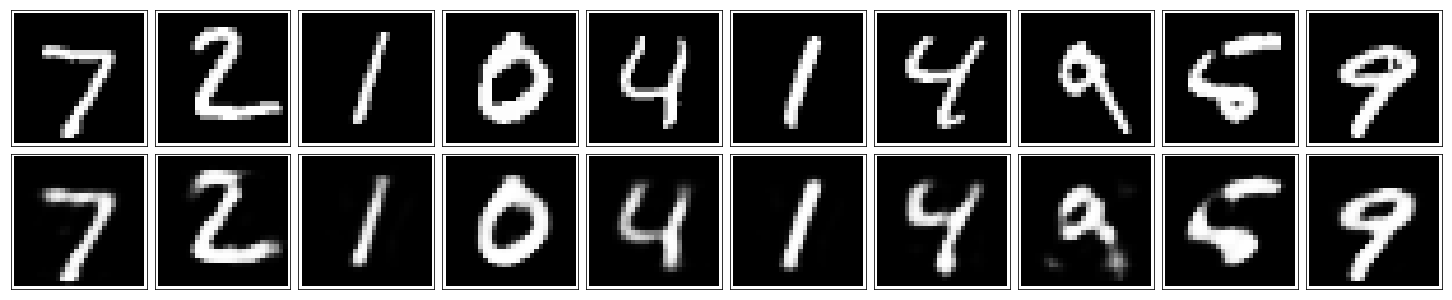

In [80]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [81]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.